# Project 1, Part 3: Data Analysis & Visualization
## Emily Feuss

### My research questions:

- **QUESTION 1**: Which degree program has the highest percentage of women? Which has the lowest? And what is the span between the two? 



- **QUESTION 2**:  Comparing 2 age groups: under 25 and over 25, when looking at their degree programs. What kind of differences will we see in Associates path vs Certifications. **<18, 19-20, 21-24** vs **25-34, 35-64, 65+**


- **QUESTION 3**: How does the impact of middle/high school (1) computing classes and (2) computing related clubs compare to other factors? This could tell us how much sense it might make to focus on HS level programs - could CCM host clubs or events. 

4. For those respondents who changed majors, which previous major led to the strongest move toward CompSci? Could target students in these departments, maybe create new computer classes that align with those departments to encourage transition.
> (Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.)

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

## In Part 2, I decided to move forward with my quantified data

- No Impact - 0
- Some Impact - 1
- High Impact - 2

- Yes - 1
- No - 0

In [4]:
major_survey = pd.read_csv("MSR - quantified data.csv")

In [159]:
major_survey.shape

(1002, 34)

## Question 1: Which degree program has the highest percentage of women? Which has the lowest? And what is the span between the two? 

In [19]:
# first creating new data sets for women respondants and men respondants
women = major_survey.query('GENDER == "Woman"')
women.shape

(189, 34)

In [24]:
men = major_survey.query('GENDER == "Man"')
men.shape

(771, 34)

We have an interesting observation here just from seeing the unequal distribution of responders who identified as "man" over those who identified as "woman". Just 19.68% of responders answered as "woman".

In [56]:
# getting a count of each degree program for women & men
women_degree_percent = women['DEG_PROGRAM'].value_counts(normalize=True).rename_axis('Degree').reset_index(name='Percentage')
print('PERCENTAGE OF WOMEN IN EACH DEGREE PROGRAM - TOP 5')
print(women_degree_percent.head(5))
print()

men_degree_percent = men['DEG_PROGRAM'].value_counts(normalize=True).rename_axis('Degree').reset_index(name='Percentage')
print('PERCENTAGE OF MEN IN EACH DEGREE PROGRAM - TOP 5')
print(men_degree_percent.head(5))


PERCENTAGE OF WOMEN IN EACH DEGREE PROGRAM - TOP 5
                   Degree  Percentage
0        Computer Science    0.275132
1   Information Tech0logy    0.153439
2  ShareTime CSIP Program    0.089947
3       0n Degree seeking    0.089947
4                Business    0.063492

PERCENTAGE OF MEN IN EACH DEGREE PROGRAM - TOP 5
                             Degree  Percentage
0                  Computer Science    0.308690
1             Information Tech0logy    0.267185
2  Mechanical Engineering Tech0logy    0.083009
3            ShareTime CSIP Program    0.059663
4                         Undecided    0.044099


### First thing that stands out to me is that a larger portion of women were enrolled in the ShareTime CSIP Program at 8.99%, while only 5.96% of men were enrolled in that program. 

### Women were also more likely to be enrolled in business, at 6.35% versus the answers men respondants provided at 2.85% enrolled in business.

In [295]:
# taking a look at the bottom spread of degree counts

print('PERCENTAGE OF WOMEN IN EACH DEGREE PROGRAM - BOTTOM 5')
women['DEG_PROGRAM'].value_counts().tail(5)

PERCENTAGE OF WOMEN IN EACH DEGREE PROGRAM - BOTTOM 5


DEG_PROGRAM
Psychology                   1
Biology                      1
Eco0mics                     1
Culinary Arts and Science    1
Technical Studies            1
Name: count, dtype: int64

## As you can see, our bottom 5 responses for women respondants were all one-off choices. I decided to change up my question a little here and focus more on the top choices and where the differences were between women & men. 

Otherwise, we'd have to make a selection as to what a "meaningful" selection of bottom choices would be and where to cut off answers, and I don't think that's wise or helpful. There will always be random interest from a variety of fields in computer science, but that doesn't necessarily mean it's worth capitalizing on or increasing.

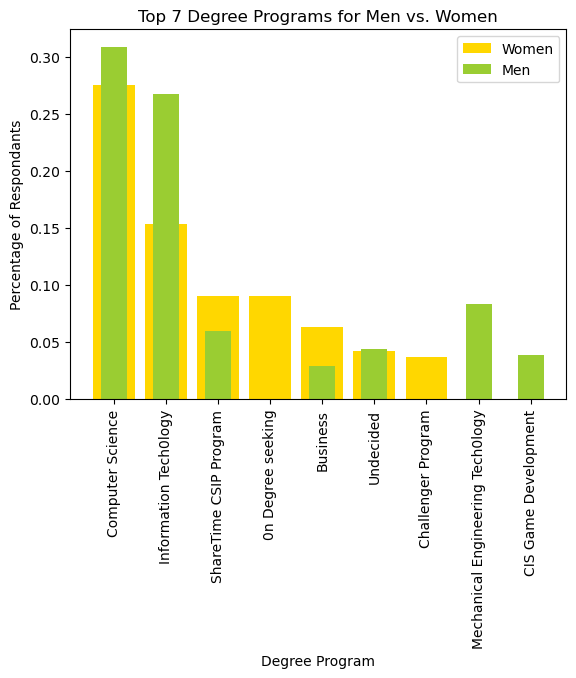

In [94]:
x = np.arange(2)
w = 0.25

plt.bar(women_degree_percent['Degree'].head(7), women_degree_percent['Percentage'].head(7), label = "Women", color='gold')
plt.bar(men_degree_percent['Degree'].head(7), men_degree_percent['Percentage'].head(7), width = 0.5, label="Men", color='yellowgreen')

plt.xticks(rotation=90)

plt.xlabel('Degree Program')
plt.ylabel('Percentage of Respondants')
plt.title('Top 7 Degree Programs for Men vs. Women')

plt.legend(loc='best')
plt.show()

#### I opted for the top 7 degree program responses, because for women respondants, after this point answers start being 6 or less per unique value, so these top 7 felt like they captured the core of the answers. This isn't necessarily as true for the men, but I felt like this question wanted to dive more deeply in where women deviated with increased interest.

# From the data, we can see that Information Technology is largely dominated by men, while the ShareTime CSIP Program seems to show particularly strong participation by women.

# Women in business degree programs also widely outnumber men who are enrolled in business degree programs.

From the numbers of the ShareTipe CSIP Program, things seem promising for young women, as it's good that they're getting interested at the high school level. It would definitely be worth diving into the age distributions to see if this changes as women get older. It might also be worth following up with ShareTime CSIP women participants to see if they stick with computer science after graduating their program.

This would be a good opportunity to see if capturing the interest of young women keeps them going in the field, or if there is a reason they might stop after high school. If they keep going, then it would be worth investing more strongly to compel teenage girls to consider alternate schooling pathways to encourage them to check out the ShareTime CSIP (or other related) programs. 

If they do not continue after graduating, it would be worthwhile to find out why. But that's another survey!

As for the strong response of women in business, this could be a good opportunity to advertise the benefits of computer science and data analytics to business majors in general. There's definitely a benefit to improving analytical skills in business, and it seems like women are more likely to undertake the courses that would show the importance of cross-training on these skills to improve their resume and marketability in the business world.

---

## Question 2: Comparing 2 age groups: under 25 and over 25, when looking at their degree programs. What kind of differences will we see in Associates path vs Certifications. <18, 19-20, 21-24 vs 25-34, 35-64, 65+

In [99]:
major_survey['AGE'].value_counts()

AGE
18 and younger    369
19-20             316
21-24             162
25-34             103
35-64              47
65+                 5
Name: count, dtype: int64

In [112]:
young = 369 + 316 + 162
older = 103 + 47 +5
print(f'There are {young} respondants under 25 & {older} respondants over 25.')

There are 847 respondants under 25 & 155 respondants over 25.


### Looks like 84.5% of our respondants are under 25! 

In [270]:
## separating out young (18 - 24) and older (25 - 65) respondants

young = major_survey[major_survey["AGE"].str.contains("18|19|21")]

In [272]:
older = major_survey[major_survey["AGE"].str.contains("25|35|65")]

In [293]:
young["DEG_PROGRAM"].nunique()

38

In [294]:
older["DEG_PROGRAM"].nunique()

19

### There's a bit more diversity in degree programs for the younger group of respondants versus the older group at 38 degree selections over the younger spread to 19 degree selections for the older. This could partially be due to the data skewing towards the younger end. But could also indicate more focused selections from the older crowd.

Text(0, 0.5, '')

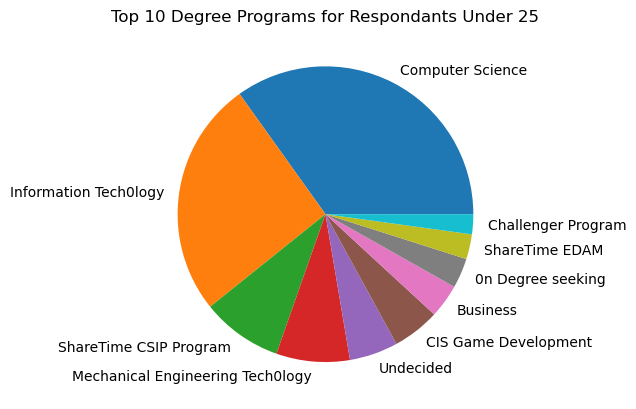

In [287]:
young.DEG_PROGRAM.value_counts().head(10).plot(kind = 'pie')
plt.title('Top 10 Degree Programs for Respondants Under 25')
plt.ylabel('')

Text(0, 0.5, '')

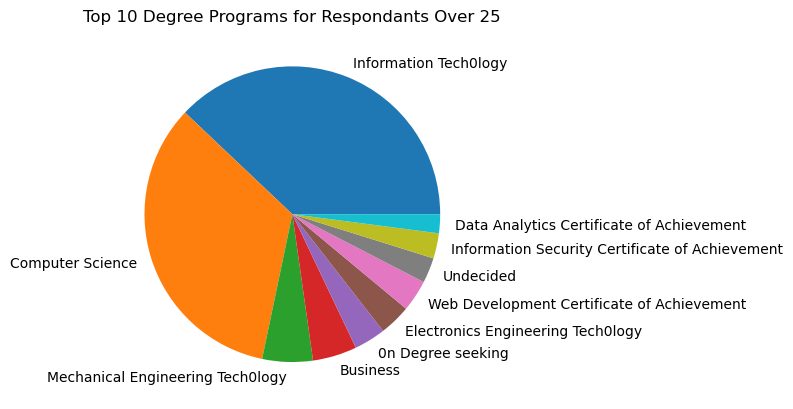

In [288]:
older.DEG_PROGRAM.value_counts().head(10).plot(kind = 'pie')
plt.title('Top 10 Degree Programs for Respondants Over 25')
plt.ylabel('')

In [289]:
## column 16 is degree program, getting percentage of young group respondants in each degree
young.iloc[:, 16].value_counts(normalize=True)

DEG_PROGRAM
Computer Science                                   0.302243
Information Tech0logy                              0.224321
ShareTime CSIP Program                             0.076741
Mechanical Engineering Tech0logy                   0.069658
Undecided                                          0.046045
CIS Game Development                               0.044864
Business                                           0.031877
0n Degree seeking                                  0.028335
ShareTime EDAM                                     0.023613
Challenger Program                                 0.018890
Digital Media Tech0logy                            0.017710
Information Security Certificate of Achievement    0.015348
Electronics Engineering Tech0logy                  0.014168
Liberal Arts                                       0.010626
High School Student                                0.009445
Data Analytics Certificate of Achievement          0.009445
Technical Studies           

In [290]:
## column 16 is degree program, getting percentage of older group respondants in each degree
older.iloc[:, 16].value_counts(normalize=True)

DEG_PROGRAM
Information Tech0logy                              0.354839
Computer Science                                   0.316129
Mechanical Engineering Tech0logy                   0.051613
Business                                           0.045161
0n Degree seeking                                  0.032258
Electronics Engineering Tech0logy                  0.032258
Web Development Certificate of Achievement         0.032258
Undecided                                          0.025806
Information Security Certificate of Achievement    0.025806
Data Analytics Certificate of Achievement          0.019355
Mathematics                                        0.012903
Engineering                                        0.006452
Chemistry                                          0.006452
CIS Game Development                               0.006452
Radiography                                        0.006452
Graphic Design                                     0.006452
Finance                     

Let's group our data by Certificates of Achievement (CoA) and Associates Path degrees.


|       DEGREE              | YOUNGER | OLDER |
| --------------------------|---------|-------|
| Information Security, CoA |  1.53%  | 2.58% |
| Data Analytics, CoA       |  0.94%  | 1.94% |
| Web Development, CoA      |  0.23%  | 3.23% |
|                           |         |       |
| Computer Science          |  30.2%  | 31.6% |
| Information Technology    |  22.4%  | 35.5% |
| Mechanical Engineering    |  6.70%  | 5.16% |
| CIS Game Development      |  4.49%  | 0.65% |
| Business                  |  3.19%  | 4.52% |
| Digital Medial Technology |  1.77%  |  N/A  |
| Electronics Engineering   |  1.42%  | 3.23% |
| Undecided / Non Degree    |  7.44%  | 5.81% |



### While Certificates of Achievement are definitely a bit more popular with those students over 25, it's not as biased as I would have thought. Only 7.75% of older students are enrolled in Certificates, compared to 2.7% of those under 25.

What I though was a little more interesting is the bias of those students over 25 in Information Technology. There's pretty comparable percentages for below & above 25 in Computer Science, but the over 25 crowd seems very drawn to IT. 

## A potential spot for growth might lie in encouraging younger students to add on a Certificate of Achievement to their current degree path. 

This could be assisted by working with other departments to utilize Computer Science classes as prerequisites or by seeing what combination classes could be created. As we saw above, women in business are more likely to take computer classes then their men counterparts - what if we further encourage this with a pathway to a Business Degree + Certificate?

---

## Question 3: How does the impact of middle/high school (1) computing classes and (2) computing related clubs compare to other factors? This could tell us how much sense it might make to focus on HS level programs - could CCM host clubs or events. 

In [134]:
major_survey.iloc[:, 2:4].describe()

,IM_MSHS_CLASS,IM_MSHS_CLUB
count,864.000000,794.000000
mean,0.775463,0.335013
std,0.792812,0.607734
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,2.000000,2.000000


The question was "to what extent did the following activities or experience impact your decision to enroll in an computing course at CCM?" 

The survey results were quantified so 'no impact' = 0, 'some impact' = 1, and 'high impact' = 2

### Here we can see the impact of a middle or high school club was fairly low for respondants, with a mean response of 0.33. A middle or high school class had a bit of a higher impact, at 0.77.

#### There's a pretty high standard deviation in both cases, so we can tell there was a pretty wide range of answers. We can see from the histogram below that we recieved a lot of 'no impact' responses.

In [148]:
major_survey.iloc[:, 2].value_counts()

IM_MSHS_CLASS
0.0    390
1.0    278
2.0    196
Name: count, dtype: int64

In [149]:
major_survey.iloc[:, 3].value_counts()

IM_MSHS_CLUB
0.0    586
1.0    150
2.0     58
Name: count, dtype: int64

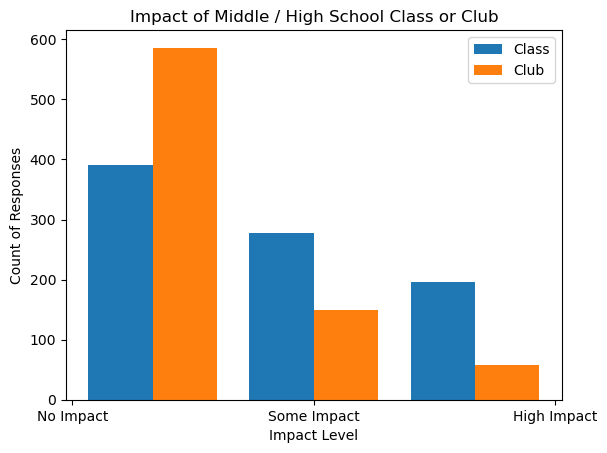

In [146]:
plt.hist(major_survey.iloc[:, 2:4], bins=3)

plt.xticks(ticks=[0,1,2], labels=['No Impact', 'Some Impact', 'High Impact'])

plt.xlabel('Impact Level')
plt.ylabel('Count of Responses')
plt.title('Impact of Middle / High School Class or Club')

plt.legend(['Class','Club'], loc='best')

In [136]:
# looking at other impact potential answers
major_survey.iloc[:, 4:16].describe()

,IM_COMPETIT,IM_AFTERSCHOOL,IM_SUMMERCAMP,IM_APCLASS,IM_DUAL,IM_FAM_INFLU,IM_FAM_WORK,IM_HSTEACH,IM_EMPLOY,IM_STUDENT,IM_WORK,IM_OTHER
count,814.000000,765.000000,764.000000,764.000000,759.000000,883.000000,857.000000,852.000000,790.000000,819.000000,811.000000,729.000000
mean,0.479115,0.213072,0.176702,0.287958,0.235837,0.966025,0.833139,0.507042,0.167089,0.365079,0.307028,0.502058
std,0.723141,0.506850,0.476369,0.631885,0.575197,0.835019,0.855943,0.701650,0.464103,0.659556,0.611162,0.800281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## It looks like the impact of a family member's influence or work history is the most meaningful when students are entering the field of computer science. There's not much CCM can do to influence this. 

As such, it doesn't seem like it would be beneficial to invest in middle and high school classes or clubs as a means of increasing enrollment in the computer science department. 

---


## Question 4: For those respondents who changed majors, which previous major led to the strongest move toward CompSci? Could target students in these departments, maybe create new computer classes that align with those departments to encourage transition.

In [158]:
# noticed a lot of blank responses here, wanted to dive into how many we have and why
major_survey[["FIRST_CHOICE"]].count()

FIRST_CHOICE    709
dtype: int64

The question was - was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.

### At the question "what degree program are you currently enrolled in", the survey splits. If you answer a computer science based degree, you enter a series of question that ends with the question of whether or not this was your first choice. As such, not all survey takers encountered this question. Out of our 1002 respondants, only 709, or 70.75% came to this question.

In [156]:
# column 29, first choice

major_survey.iloc[:, 29].value_counts()

FIRST_CHOICE
First Choice                             500
Engineering                               46
Business                                  28
Science                                   21
LIberal Arts                              17
Criminal Justice                           9
Nursing                                    9
Mechanical Engineering and Tech0logy       6
Exercise Science                           6
Game Development                           6
Biology                                    6
Computer Science                           6
Graphic Design                             4
Radiography                                4
Hospitality                                3
Architecture                               3
Music                                      3
Psychology                                 2
Exercise science                           2
Cybersecurity                              2
Math                                       2
Mathematics                               

In [162]:
500/709*100

70.52186177715092

### Out of respondants who made it to this question, for 70.5% of them, their computer science related degree program was their first choice.

In [171]:
top_choices = major_survey['FIRST_CHOICE'].value_counts().head(7).rename_axis('First Choice').reset_index(name='Counts')

top_choices


,First Choice,Counts
0,First Choice,500
1,Engineering,46
2,Business,28
3,Science,21
4,LIberal Arts,17
5,Criminal Justice,9
6,Nursing,9


Text(0.5, 1.0, 'First Choice Degree for Computer Science Enrollees')

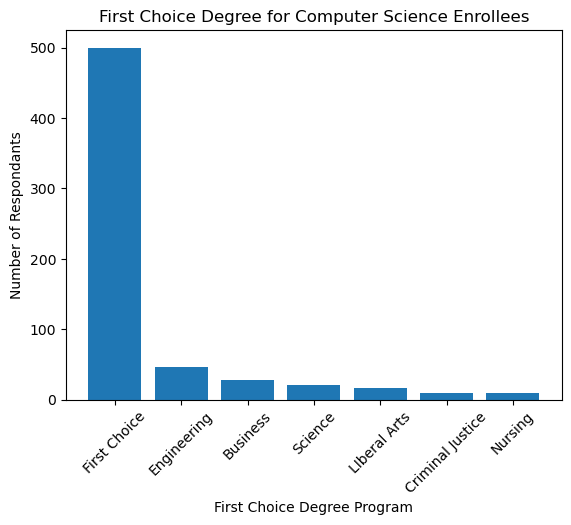

In [174]:
plt.bar(top_choices['First Choice'], top_choices['Counts'])

plt.xticks(rotation=45)

plt.xlabel('First Choice Degree Program')
plt.ylabel('Number of Respondants')
plt.title('First Choice Degree for Computer Science Enrollees')



## As you can easily see, most people are enrolled in their first choice degree program - computer science. Which shows there is a lot of interest!

But unfortunately, no other degree stands out to focus on to encourage new recruits. Although, after seeing the data for women respondents in question 1, and seeing that business is in second place for transitioning to computer science, it might mean business majors are a group to target for enrollment in computer science classes. 

Perhaps collaboration between the computer science department and the business classes could yield positive results in encouraging business majors to consider adding on computer science certifications (such as data analytics!) or to consider what computer science classes could fulfill business degree prerequisites to help make for a more seamless transition. 